<a href="https://colab.research.google.com/github/ppyyyhhh/MachineLearning/blob/master/Week6_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
logistic_regression = keras.models.Sequential()
logistic_regression.add(keras.layers.Dense(3, activation='softmax'))


In [6]:
from keras.utils import np_utils 

X = iris.data
y = iris.target

y_one_hot = np_utils.to_categorical(y, 3)
X_train, X_test, y_train, y_test = train_test_split(iris.data, y_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(iris.data, y_one_hot, test_size=0.5, random_state=42)

In [7]:
logistic_regression.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = logistic_regression.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 2.2149 - accuracy: 0.3417 - val_loss: 1.6265 - val_accuracy: 0.4400
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2614 - accuracy: 0.5833 - val_loss: 0.9495 - val_accuracy: 0.6267
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8041 - accuracy: 0.6667 - val_loss: 0.7302 - val_accuracy: 0.6267
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.7250 - val_loss: 0.6788 - val_accuracy: 0.8667
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6499 - accuracy: 0.8583 - val_loss: 0.6675 - val_accuracy: 0.8800
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6379 - accuracy: 0.8750 - val_loss: 0.6588 - val_accuracy: 0.8533
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6321 - accuracy: 0.8833 - val_loss: 0.6524 - val_accuracy: 0.8000
Epoch 8/100
4/4 [=========

In [9]:
import pandas as pd

def plot_history(history):
  pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
  plt.grid(True)
  plt.show()

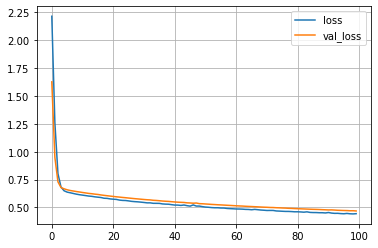

In [10]:
plot_history(history)

In [11]:
y_pred = logistic_regression.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [12]:
from sklearn.metrics import classification_report
import numpy as np

y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.91      0.95        23
           2       0.92      1.00      0.96        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## Training an Image classifier

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [18]:

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

In [20]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [21]:
classes[y_train[0]]

'Sneaker'

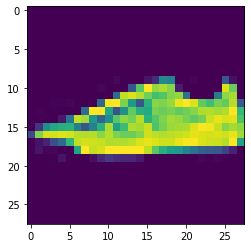

In [22]:
plt.imshow(X_train[0])

In [23]:
print(X_train.shape)

(48000, 28, 28)


In [41]:
# Parameters - this is for illustration purposes, ideally this would be in a dictionary that could be passed to a function
# model parameters
hidden_layer_sizes = [500, 200, 250, 700, 450, 600, 2000]
hidden_layer_activations = ['relu'] * len(hidden_layer_sizes)
dropout = [0.0] * len(hidden_layer_sizes)
initializer = keras.initializers.GlorotNormal()

number_of_classes = len(classes)

# Training parameters
opt = keras.optimizers.Adam(learning_rate=0.01)
batch_size = 512
epoch_n = 2000
loss = 'sparse_categorical_crossentropy'


In [42]:
def create_model(layers, activations,n_classes, dropout, initializer=keras.initializers.RandomUniform()):

  model = keras.models.Sequential()

  model.add(keras.layers.Flatten(input_shape=[28, 28]))

  for idx, layer in enumerate(layers):
      model.add(keras.layers.Dense(layer, activation=activations[idx], kernel_initializer=initializer)) # create layer with size, activation function and initializer
      if dropout[idx] > 0.0 and idx < len(layers) - 1: 
        model.add(keras.layers.Dropout(dropout[idx]))


  model.add(keras.layers.Dense(n_classes, activation='softmax'))
  return model

In [43]:
model = create_model(hidden_layer_sizes, hidden_layer_activations, len(classes), dropout, initializer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_26 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_27 (Dense)             (None, 250)               50250     
_________________________________________________________________
dense_28 (Dense)             (None, 700)               175700    
_________________________________________________________________
dense_29 (Dense)             (None, 450)               315450    
_________________________________________________________________
dense_30 (Dense)             (None, 600)              

In [45]:
def train_model(X_train, y_train, X_valid, y_valid, model, opt='sgd', batch_size=20, epochs=20, loss='sparse_categorical_crossentropy'):
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), batch_size=batch_size)
  return model, history

In [ ]:
model, history = train_model(X_train, y_train, X_valid, y_valid, model, opt=opt, batch_size=batch_size, epochs=epoch_n, loss=loss)

Epoch 1/2000
94/94 [==============================] - 1s 8ms/step - loss: 1.9743 - accuracy: 0.4801 - val_loss: 0.6522 - val_accuracy: 0.7562
Epoch 2/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.6098 - accuracy: 0.7688 - val_loss: 0.5444 - val_accuracy: 0.8029
Epoch 3/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.4961 - accuracy: 0.8190 - val_loss: 0.5282 - val_accuracy: 0.7992
Epoch 4/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.4742 - accuracy: 0.8295 - val_loss: 0.4529 - val_accuracy: 0.8423
Epoch 5/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.4248 - accuracy: 0.8476 - val_loss: 0.4748 - val_accuracy: 0.8285
Epoch 6/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.4032 - accuracy: 0.8534 - val_loss: 0.4077 - val_accuracy: 0.8533
Epoch 7/2000
94/94 [==============================] - 1s 6ms/step - loss: 0.3873 - accuracy: 0.8626 - val_loss: 0.4145 - val_accuracy: 0.8538
Epoch 

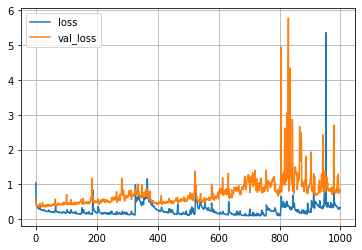

In [30]:
plot_history(history)

In [31]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_weights.hdf5", verbose=1, save_best_only=True),
]

dropout = [0.2] * len(hidden_layer_sizes)
model = create_model(hidden_layer_sizes, hidden_layer_activations, len(classes), dropout, initializer)



In [33]:
def train_model_with_callbacks(X_train, y_train, X_valid, y_valid, model, opt='sgd', batch_size=20, epochs=20, loss='sparse_categorical_crossentropy', callbacks=[]):
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), batch_size=batch_size, callbacks=callbacks)
  return model, history

In [35]:
model, history = train_model_with_callbacks(X_train, y_train, X_valid, y_valid, model, opt=opt, batch_size=batch_size, epochs=epoch_n*2, loss=loss, callbacks=my_callbacks)

Epoch 1/2000
82/94 [=========================>....] - ETA: 0s - loss: 2.3031 - accuracy: 0.0997
Epoch 00001: val_loss did not improve from 2.30273
94/94 [==============================] - 1s 7ms/step - loss: 2.3031 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1002
Epoch 2/2000
93/94 [============================>.] - ETA: 0s - loss: 2.3030 - accuracy: 0.0986
Epoch 00002: val_loss did not improve from 2.30273
94/94 [==============================] - 0s 5ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.0966
Epoch 3/2000
82/94 [=========================>....] - ETA: 0s - loss: 2.3032 - accuracy: 0.0986
Epoch 00003: val_loss improved from 2.30273 to 2.30270, saving model to best_weights.hdf5
94/94 [==============================] - 1s 6ms/step - loss: 2.3032 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 4/2000
82/94 [=========================>....] - ETA: 0s - loss: 2.3029 - accuracy: 0.1001
Epoch 00004: val_loss did not improve

In [36]:
!ls



best_weights.hdf5  sample_data


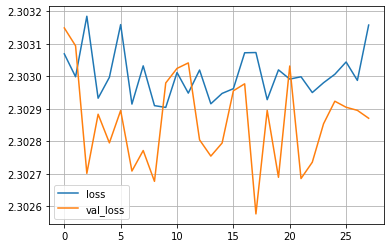

In [37]:
plot_history(history)

In [ ]:
model.load_weights('best_weights.hdf5')

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
batch_size = 128
epoch_n = 30

In [ ]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint(filepath="best_weights_iteration2.hdf5", verbose=1, save_best_only=True),
]

In [ ]:
# model, history = train_model_with_callbacks(X_train, y_train, X_valid, y_valid, model, opt=opt, batch_size=batch_size, epochs=epoch_n, loss=loss, callbacks=my_callbacks)

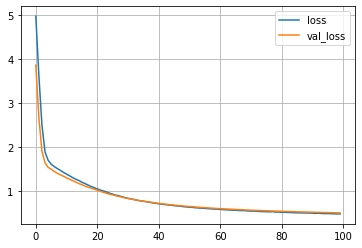

In [ ]:
plot_history(history)

In [ ]:
model.load_weights('best_weights_iteration2.hdf5')

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.76      0.77      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.39      0.91      0.54      1000
       Dress       0.73      0.83      0.78      1000
        Coat       0.82      0.25      0.38      1000
      Sandal       0.88      0.86      0.87      1000
       Shirt       0.31      0.08      0.12      1000
     Sneaker       0.69      0.88      0.77      1000
         Bag       0.91      0.94      0.92      1000
  Ankle boot       0.98      0.72      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.75      0.72      0.69     10000
weighted avg       0.75      0.72      0.69     10000



## Convolutional Neural Networks

In [ ]:

# Parameters - this is for illustration purposes, ideally this would be in a dictionary that could be passed to a function
initializer = keras.initializers.GlorotNormal()

number_of_classes = len(classes)

# Training parameters
opt = keras.optimizers.Adam(learning_rate=0.01)
batch_size = 512
epoch_n = 30
loss = 'sparse_categorical_crossentropy'

In [ ]:
from keras.layers import *
def create_conv_model(n_classes, initializer=keras.initializers.RandomUniform()):

  model = keras.models.Sequential()
  # first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(32, (3, 3), padding="same",
    input_shape=(28,28 ,1)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=1))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=1))
  model.add(keras.layers.Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  # softmax classifier
  model.add(Dense(n_classes))
  model.add(Activation("softmax"))
  # return the constructed network architecture
  return model

In [ ]:
model = create_conv_model(len(classes), initializer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)       

In [ ]:
def reshape_for_conv2d(x):
  return x.reshape(-1, 28, 28, 1) # we add an extra dimension for the number of channels (only 1 in our case)

def one_hot_encode(y):
  return pd.get_dummies(y).values

In [ ]:
model, history = train_model_with_callbacks(reshape_for_conv2d(X_train), y_train, reshape_for_conv2d(X_valid), y_valid, model, opt=opt, batch_size=256, epochs=epoch_n, loss="sparse_categorical_crossentropy", callbacks=my_callbacks)

Epoch 1/30
188/188 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.7604
Epoch 00001: val_loss improved from inf to 4.23093, saving model to best_weights_iteration2.hdf5
188/188 [==============================] - 4s 20ms/step - loss: 0.6897 - accuracy: 0.7604 - val_loss: 4.2309 - val_accuracy: 0.2858
Epoch 2/30
187/188 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.8487
Epoch 00002: val_loss improved from 4.23093 to 1.23311, saving model to best_weights_iteration2.hdf5
188/188 [==============================] - 3s 18ms/step - loss: 0.4170 - accuracy: 0.8487 - val_loss: 1.2331 - val_accuracy: 0.6192
Epoch 3/30
188/188 [==============================] - ETA: 0s - loss: 0.3703 - accuracy: 0.8662
Epoch 00003: val_loss improved from 1.23311 to 0.34561, saving model to best_weights_iteration2.hdf5
188/188 [==============================] - 3s 18ms/step - loss: 0.3703 - accuracy: 0.8662 - val_loss: 0.3456 - val_accuracy: 0.8727
Epoch 4/30
186/18

In [ ]:
model.predict(reshape_for_conv2d(X_test[0]))

array([[3.0480540e-12, 3.2259407e-11, 2.3379649e-12, 1.6069101e-12,
        9.3465184e-12, 4.9917652e-08, 1.1884941e-12, 9.3820631e-08,
        1.1397693e-13, 9.9999988e-01]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(reshape_for_conv2d(X_test))

In [ ]:
print(classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.91      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.90      0.89      0.90      1000
       Dress       0.95      0.92      0.93      1000
        Coat       0.85      0.94      0.89      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.83      0.75      0.79      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



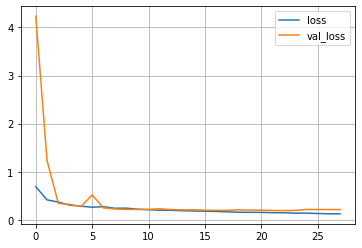

In [ ]:
plot_history(history)

## Transfer Learning

## Images

water_bottle (88.51%)


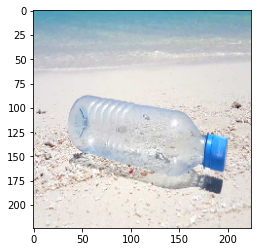

In [ ]:
#taken from https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('bottle.jpg', target_size=(224, 224))
plt.imshow(image)
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

## Text

In [ ]:
from transformers import pipeline

sentence = 'Deep learning is terrible!'

# Allocate a pipeline for sentiment-analysis
nlp = pipeline('sentiment-analysis')
nlp(sentence)


[{'label': 'NEGATIVE', 'score': 0.9983699321746826}]

In [ ]:
!pip install -U transformers

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 12.5MB/s 
     |████████████████████████████████| 890kB 18.4MB/s 
     |████████████████████████████████| 3.0MB 25.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=a19e5c9cc89ed36a679696a8c698ed264b3b6b99ea85e05386f1b6de46f1a5e6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
